<a href="https://colab.research.google.com/github/jacobrobertsdev/MLA_JAR/blob/main/FinalProject_Classification_JAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Jacob Roberts**

**Data set used: https://archive.ics.uci.edu/dataset/186/wine+quality**

Data set is for predicting high/low quality wine. There are two sets, one for white and one for red. I am using the red wine set in this notebook.

## Standard Imports

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Imports for Splitting Data and Building Pipeline


In [104]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [106]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [107]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [108]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Statistical and Visual Exploration

In [109]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


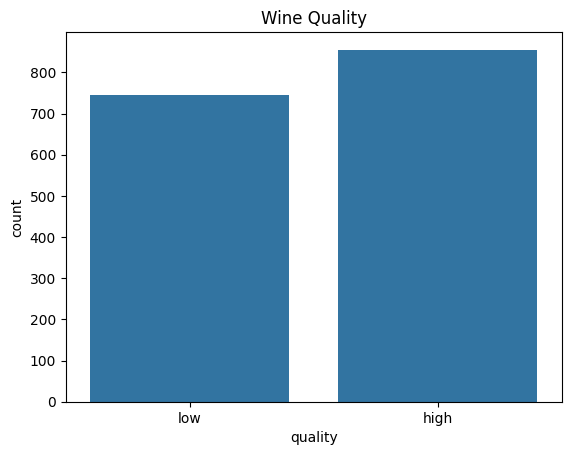

In [110]:
df['quality'] = np.where(df['quality'] <= 5, 'low', 'high')
sns.countplot(x='quality', data=df)
plt.title('Wine Quality')
plt.show()

### Splitting Data into Train/Test

In [111]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [112]:
col_transform = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), X.columns)
    ]
)

lr_pipeline = Pipeline(steps=[
    ('col_transform', col_transform),
    ('lr_classifier', LogisticRegression())
])

dt_pipeline = Pipeline(steps=[
    ('col_transform', col_transform),
    ('dt_classifier', DecisionTreeClassifier())
])

rf_pipeline = Pipeline(steps=[
    ('col_transform', col_transform),
    ('rf_classifier', RandomForestClassifier())
])


### Executing the Model

In [113]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_transform',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))])),
                ('lr_classifier', LogisticRegression())])

In [114]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_transform',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))])),
                ('dt_classifier', DecisionTreeClassifier())])

In [115]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_transform',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))])),
                ('rf_classifier', RandomForestClassifier())])

### Evaluating Model / Grid Search

              precision    recall  f1-score   support

        high       0.80      0.72      0.75       179
         low       0.68      0.77      0.72       141

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

None


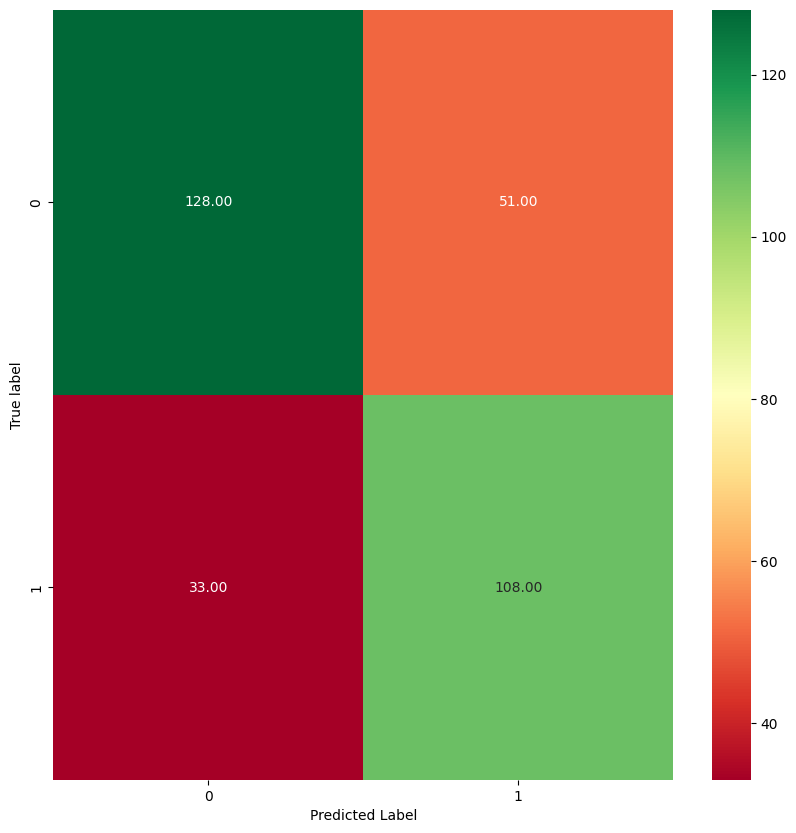

In [116]:
y_pred_lr = lr_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_lr))
print(plot_cm(y_test, y_pred_lr))

              precision    recall  f1-score   support

        high       0.78      0.75      0.77       179
         low       0.70      0.74      0.72       141

    accuracy                           0.75       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.75      0.75      0.75       320

None


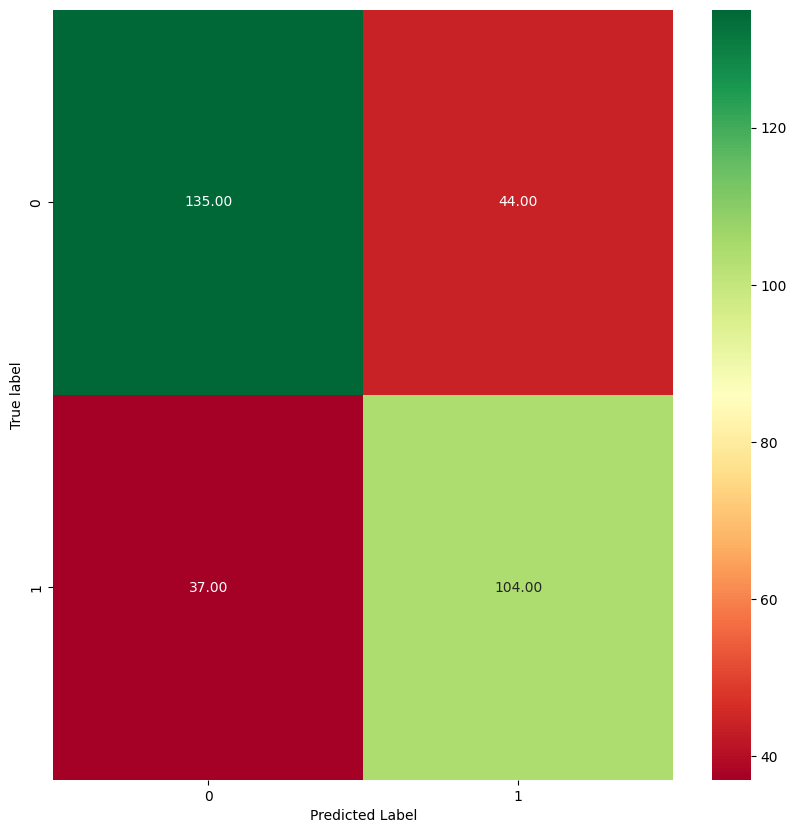

In [117]:
y_pred_dt = dt_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print(plot_cm(y_test, y_pred_dt))

              precision    recall  f1-score   support

        high       0.80      0.82      0.81       179
         low       0.76      0.74      0.75       141

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320

None


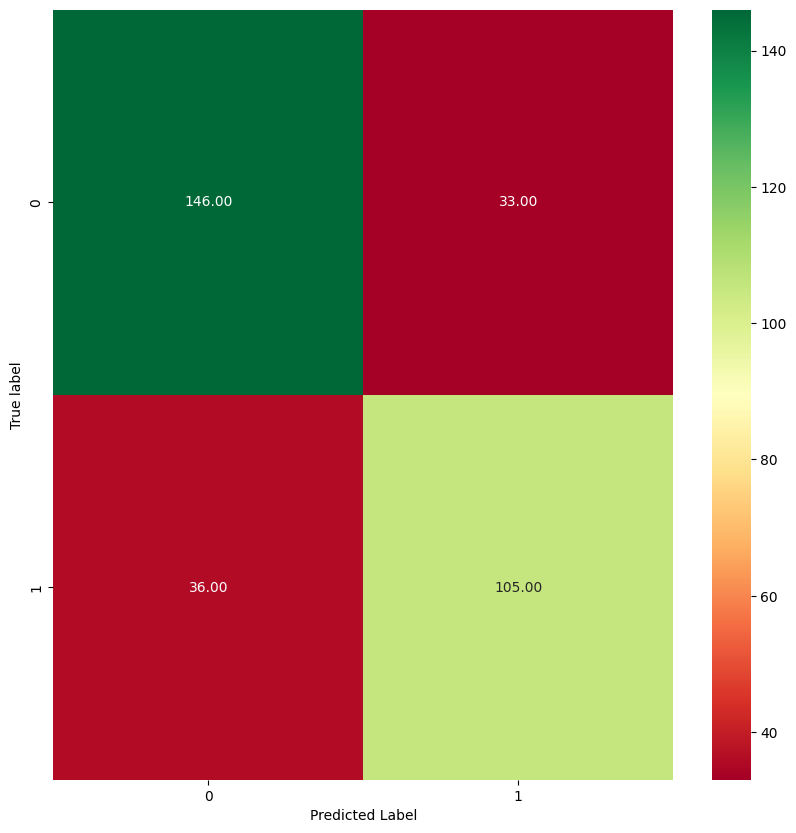

In [118]:
y_pred_rf = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(plot_cm(y_test, y_pred_rf))

              precision    recall  f1-score   support

        high       0.76      0.74      0.75       179
         low       0.68      0.71      0.69       141

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.73      0.72      0.73       320

None


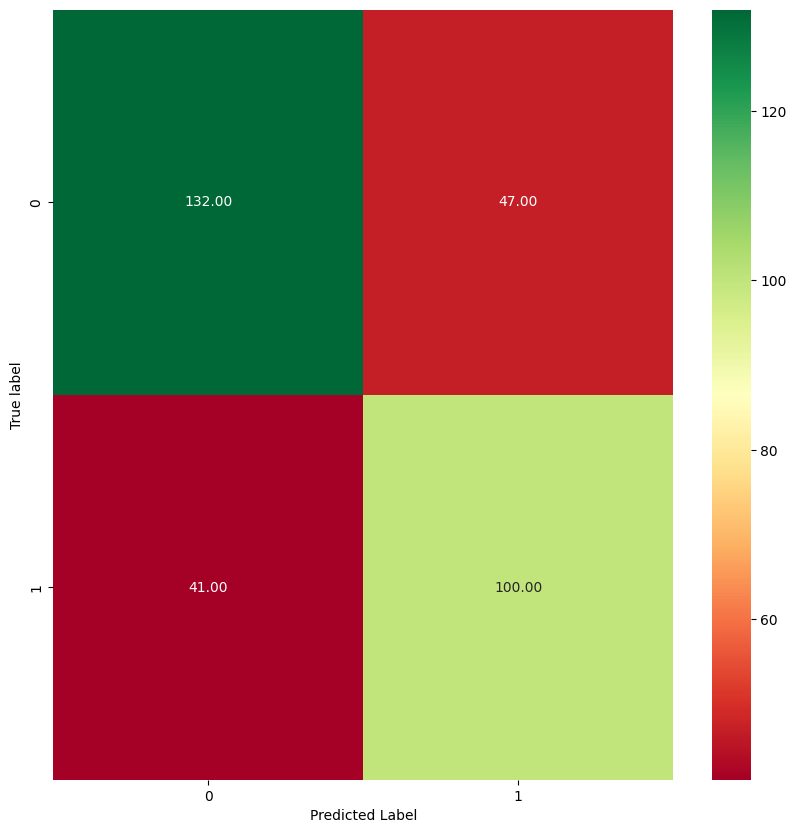

In [119]:
param_grid = {'dt_classifier__max_depth': [1, 2, 3, 4, 5, None]}
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

print(classification_report(y_test, y_pred_best_dt))
print(plot_cm(y_test, y_pred_best_dt))

### Conclusion
All four algorithms performed similarly on this data, with around 72% accuracy, and random forest doing slightly better than the other three. Logistic regression performed slightly better than the decision tree (74 vs 72 overall accuracy), and the grid search did not appear to improve our decision tree results at all. The decision tree and grid search decision tree performed almost identically. I initially chose decision tree over random forest because we used random forest in the last assignment, but later added a random forest also to see if it would do better than logistic regression or decision trees. It did do better (79 accuracy/overall average).The results from logistic regression and decision tree here were lower than I expected.